In [1]:
import tensorflow as tf
import numpy as np

print("versión de tensorflow:", tf.__version__)


versión de tensorflow: 1.4.0


### Datos de Entrenamiento

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt 
import time

### Los Ejemplos de entrenamiento están en: 
# mnist.train.images
print("Número de ejemplos de entrenamiento:", mnist.train.images.shape[0])

### El conjunto de validacion es: 
# mnist.validation
print("Número de ejemplos de validación:", mnist.validation.images.shape[0])


### El conjunto de prueba es: 
# mnist.test
print("Número de ejemplos de prueba:", mnist.test.images.shape[0])


### Cada dígito es un vector de dimensión 784 .
print("Tamaño de cada dígito:", mnist.train.images.shape[1])


### Las etiquetas se encuentran en: 
# mnist.train.labels
# mnist.validation.labels
# mnist.test.labels

print("Tamaño de cada etiqueta:", mnist.train.labels.shape[1])
#Cada etiqueta es un one-hot-vector,ie. un vector con un solo uno, las demás entradas son cero
#[1,0,0,0,0,0,0,0,0,0]  representa el número 0
#[0,1,0,0,0,0,0,0,0,0]  representa el número 1
#   .
#   .
#   .



Número de ejemplos de entrenamiento: 55000
Número de ejemplos de validación: 5000
Número de ejemplos de prueba: 10000
Tamaño de cada dígito: 784
Tamaño de cada etiqueta: 10


### Muestra Dígito 

In [4]:
#Cada dígito se almacena como un vector de 784 dimensiones. Para visualizarlo, primero lo redimensionamos a una imagen de 28x28.
def muestra_digito(x):
    """
        x: vector 
            784 dimensiones
        Muestra el vector como una imágen de 28x28
    """
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

def vis_imagen(i, conjunto="train"):
    """
        i indice del conjunto especificado
        conjunto: cadena
            Cualquiera: train, validation, test
            
        Muestra el dígito en el indice i  y su etiqueta
    """
    if(conjunto=="train"): 
        muestra_digito(mnist.train.images[i,])
        label = np.argwhere(mnist.train.labels[i])[0][0]
    elif(conjunto=="test"): 
        muestra_digito(mnist.test.images[i,])
        label = np.argwhere(mnist.test.labels[i])[0][0]
    else:
        muestra_digito(mnist.validation.images[i,])
        label = np.argwhere(mnist.validation.labels[i])[0][0]
    print("Etiqueta " + str(label))
    return



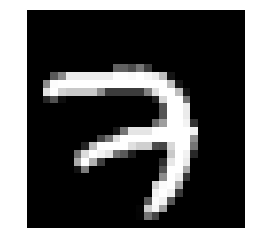

Etiqueta 7


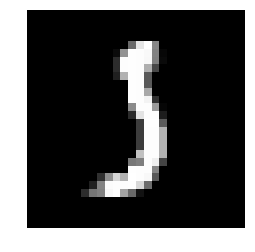

Etiqueta 5


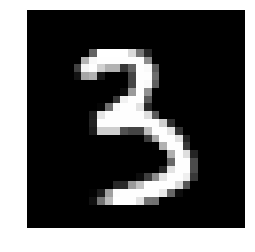

Etiqueta 3


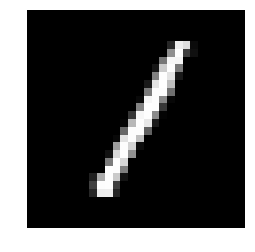

Etiqueta 1


In [5]:
vis_imagen(0, conjunto="train")
vis_imagen(132, conjunto="validation")
vis_imagen(32, conjunto="test")
vis_imagen(50000, conjunto="train")


# RED NEURONAL

## Placeholders para los datos de entrenamiento
### En ellos se pasaran despues los datos de entrenamiento (x,y)
### x imagen, y etiqueta

In [6]:
x = tf.placeholder(tf.float32, shape=[None, 784]) 
y = tf.placeholder(tf.float32, shape=[None, 10])

### Variables del modelo


In [7]:
### Capa 1
W_1 = tf.Variable(tf.truncated_normal(shape = [784,512], stddev=0.2))
b_1 = tf.Variable(tf.zeros([512]))

### Capa 2 de salida
W_2 = tf.Variable(tf.truncated_normal(shape = [512,10], stddev=0.2))
b_2 = tf.Variable(tf.zeros([10]))


### Arquitectura de la red neural

In [8]:
def NN(x):
    """
        x: matriz
            su forma  debe ser (m, 784)
            
        regresa la activación de la capa de salida
        matriz de (m, 10)
    """
    # Capa Escondida 1. 
    z_1 = tf.matmul(x,W_1) + b_1 ### Combinación lineal
    a_1  = tf.nn.relu(z_1)     ### Activación (función no lineal)
    
    # Capa 2. Está es la capa de salida
    z_2 = tf.matmul(a_1,W_2) + b_2 ### Combinación lineal
    
    return z_2

### Función de costo

In [9]:
y_ = NN(x)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_, labels = y))

### Predicciones

In [10]:
train_pred = tf.nn.softmax(y_) # predicciones en el conjunto de entrenamiento
### Nota: la función softmax calcula la probabilidad de cada etiqueta del 0 al 9.
#Para obtener la predicción necesitamos usar las función tf.argmax(y_,1) o su versión en python np.argmax(y_,1)
#Así se elige el dígito más probable para la imágen
#Esto lo hace la función precision

y_valid = NN(mnist.validation.images)
valid_pred = tf.nn.softmax(y_valid) # predicciones en el conjunto de validación

### Optimizador 

In [11]:
opt = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

### Sesión e inicializacion de varables

In [12]:
sess = tf.Session() #Crea una sessión
sess.run(tf.global_variables_initializer())

In [13]:
### Precisión
def precision(predicciones, etiquetas):
    return (100.0 * np.sum(np.argmax(predicciones, 1) == np.argmax(etiquetas, 1))
          / predicciones.shape[0])

### Entrenamiento 

In [59]:
%%time 

pasos = 5000

print("Entrenamiento:")
for i in range(pasos):
    batch = mnist.train.next_batch(100)
    _,costo,predicciones =  sess.run([opt, cross_entropy, train_pred],  feed_dict={x: batch[0], y: batch[1]})
    
    if (i % 500 == 0):
        print("Costo del minibatch hasta el paso %d: %f" % (i, costo))
        print("Precisión en el conjunto de entrenamiento: %.1f%%" % precision(predicciones, batch[1]))
        print("Precision en el conjunto de validación: %.1f%%" % precision(
        valid_pred.eval(session=sess), mnist.validation.labels))
        print("\n")

Entrenamiento:
Costo del minibatch hasta el paso 0: 0.001599
Precisión en el conjunto de entrenamiento: 100.0%
Precision en el conjunto de validación: 98.0%


Costo del minibatch hasta el paso 500: 0.001761
Precisión en el conjunto de entrenamiento: 100.0%
Precision en el conjunto de validación: 97.9%


Costo del minibatch hasta el paso 1000: 0.000944
Precisión en el conjunto de entrenamiento: 100.0%
Precision en el conjunto de validación: 97.9%


Costo del minibatch hasta el paso 1500: 0.002883
Precisión en el conjunto de entrenamiento: 100.0%
Precision en el conjunto de validación: 97.9%


Costo del minibatch hasta el paso 2000: 0.002234
Precisión en el conjunto de entrenamiento: 100.0%
Precision en el conjunto de validación: 97.9%


Costo del minibatch hasta el paso 2500: 0.000586
Precisión en el conjunto de entrenamiento: 100.0%
Precision en el conjunto de validación: 97.9%


Costo del minibatch hasta el paso 3000: 0.001645
Precisión en el conjunto de entrenamiento: 100.0%
Precisio

In [60]:
y_test = NN(mnist.test.images)
test_prediction = tf.nn.softmax(y_test)
print("Precisión en el conjunto de PRUEBA: %.1f%%" % precision(test_prediction.eval(session = sess), mnist.test.labels))    

Precisión en el conjunto de PRUEBA: 98.0%


Predicción: 1


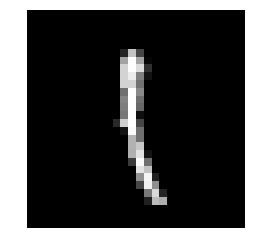

Etiqueta 1


In [61]:
indice = 251
p = tf.argmax(NN(mnist.test.images[indice:indice+1]).eval(session = sess),1)
print("Predicción:", sess.run(p)[0])
vis_imagen(indice, conjunto="test")

In [62]:
def remove_transparency(im, bg_colour=(255, 255, 255)):

    # Only process if image has transparency 
    if im.mode in ('RGBA', 'LA') or (im.mode == 'P' and 'transparency' in im.info):

        # Need to convert to RGBA if LA format due to a bug in PIL 
        alpha = im.convert('RGBA').split()[-1]

        # Create a new background image of our matt color.
        # Must be RGBA because paste requires both images have the same format

        bg = Image.new("RGBA", im.size, bg_colour + (255,))
        bg.paste(im, mask=alpha)
        return bg

    else:
        return im

# Usa tu propia imágen

### Cambia el nombre de de la variabel imagen por la tuya.
#### La imágen debe se una imágen cuadrada y cada dimensión mayor a 28.
#### Ej. una  imágen de (512,512) en formato png

In [68]:
from PIL import Image
imagen = "numero8.png"
img = Image.open(imagen)
img = remove_transparency(img).convert('L')

if  img.size != (28,28):
    img.thumbnail((28,28), Image.ANTIALIAS)

entrada = np.array(img, dtype = np.float32)
entrada = entrada.reshape((1,784))
entrada = entrada/255.0
        
p = tf.argmax(NN(entrada).eval(session = sess),1)
print("Imágen:{}".format(imagen))
img.show()
print("Predicción:", sess.run(p)[0])




Imágen:numero8.png
Predicción: 8
